<a href="https://colab.research.google.com/github/kfahn22/Colab_notebooks/blob/main/hinton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import matplotlib.colors as mcolors

# Define new colormap
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.colors import LinearSegmentedColormap
colors1 = mcolors.CSS4_COLORS
colors2 = mcolors.XKCD_COLORS

def make_colormap(n_bins, color_choices=None):
    """Return a LinearSegmentedColormap
    color1 and color2 are the two colors that are interpolated between
    n_bins: Discretizes the interpolation into bins
    """
    if color_choices is None:
        colors = colors2
    color_name1 = random.choice(list(colors.keys()))
    color_name2 = random.choice(list(colors.keys()))
    color1 = colors[color_name1]
    color2 = colors[color_name2]
    cmap_name = color_name1 + '/' + color_name2
    color_choices = [color1, color2]
    for n_bin in range(n_bins):
      cmap = LinearSegmentedColormap.from_list(cmap_name, color_choices, N=n_bin)
    return cmap, color_name1, color_name2

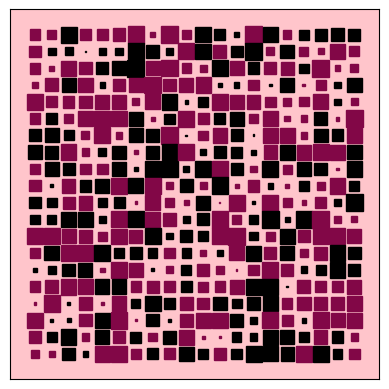

In [7]:
import matplotlib.pyplot as plt
import numpy as np


def hinton(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()

    colormap = make_colormap(4)
    c1 = colormap[1]
    c2 = colormap[2]
    if not max_weight:
        max_weight = 2 ** np.ceil(np.log2(np.abs(matrix).max()))

    ax.patch.set_facecolor(c1)
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x, y), w in np.ndenumerate(matrix):
        color = c2 if w > 0 else 'black'
        size = np.sqrt(abs(w) / max_weight)
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    ax.autoscale_view()
    ax.invert_yaxis()


if __name__ == '__main__':
    # Fixing random state for reproducibility
    np.random.seed(19680801)
    cmap = make_colormap(4)
    hinton(np.random.rand(20, 20) - 0.5)
    plt.show()